## 集合set:无序、可变序列
- 使用一对大括号{}界定，元素不可重复，同一个集合中每个元素都是唯一的
- 只能包含数字、字符串、元组等不可变类型（或者说可哈希）的数据
- 不能包含列表、字典、集合等可变类型的数据。

### |:并集，&:交集，-：差集，^:对称差集(属于a|b不属于a&b）

In [ ]:
a={100,200,300}
b={100,200,400}
print(a | b)#{100,200,300,400}
print((a | b)-b)#{300}
print(a ^ b)#{300,400}
print(a & b)#{100,200}

{400, 100, 200, 300}
{300}
{400, 300}
{200, 100}


### 关系运算符<： 包含关系测试，测试是否为子集

In [17]:
{1,2,3}<{1,2,3,4}#是子集

True

In [8]:
x = {1, 2, 3}
y = {1, 2, 5}
z = {1, 2, 3, 4}
print(x < y)                                #测试x是否是y的子集
print(x < z)                                #测试x是否是z的子集
print(y < z)                                #测试y是否是z的子集
print({1, 2, 3} <= {1, 2, 3} )              #测试是否是相同的集合

False
True
False
True


### 成员测试运算符in：测试一个对象是否为另一个对象的元素

In [18]:
3 in [1,2,3]

True

In [19]:
'abc' in 'abcdegf'#子字符串测试 

True

In [20]:
5 in range(1,10,1)

True

### set():将其他序列类型转化为集合类型

In [3]:
a_set = set(range(8,14))
print(a_set)

b_set = set([0, 1, 2, 3, 0, 1, 2, 3, 7, 8])   #自动去除重复
print(b_set)

c_set = set()                                 #空集合
print(c_set)

{8, 9, 10, 11, 12, 13}
{0, 1, 2, 3, 7, 8}
set()


#### 使用del命令删除整个集合

In [7]:
d_set = set('abc')                            #字符串转集合
print(d_set)
try:
    del d_set['a']                                #集合不支持索引
except TypeError as e:
    print(e)
    
del d_set
try:
    print(d_set)                               #此时整个集合已被删除
except NameError as e:
    print(e) 

{'a', 'b', 'c'}
'set' object does not support item deletion
name 'd_set' is not defined


#### pop()方法:弹出并删除其中一个元素,返回该元素

In [9]:
d_set = set('abc')                            #字符串转集合
print(d_set)
d_pop=d_set.pop()                             #随机删除一个元素
print(d_pop)
print(d_set) 

{'a', 'b', 'c'}
a
{'b', 'c'}


#### remove()方法：直接删除指定元素，无返回值

In [29]:
d_set = set('abc')                            #字符串转集合
print(d_set)
d_set.remove('a')                       #删除指定元素
print(d_set) 
try:
    d_set.remove('d')                       #删除集合中不存在的元素会报错
except KeyError as e:
    print("KeyError:",e)

{'a', 'b', 'c'}
{'b', 'c'}
KeyError: 'd'


#### clear()：方法清空集合

In [13]:
d_set = set('abc')                            #字符串转集合
print(d_set)
d_set.clear()                     #清空集合
print(d_set) 

{'a', 'b', 'c'}
set()


#### discard()：用于从集合中移除指定的元素。
与 remove() 方法不同的是在集合中不存在要移除的元素时不会引发错误

In [27]:
d_set = set('abc')                            #字符串转集合
print(d_set)
d_set.discard('a')                       #删除指定元素
print(d_set) 
d_set.discard('e')                       #删除指定元素
print(d_set) 

{'a', 'b', 'c'}
{'b', 'c'}
{'b', 'c'}


#### add()方法：给集合添加元素

In [14]:
d_set = set('abc')                            #字符串转集合
print(d_set)
d_set.add('d')                     #添加元素
print(d_set)

{'a', 'b', 'c'}
{'d', 'a', 'b', 'c'}


#### 集合推导式

In [38]:
s = {x.strip() for x in ('  he  ', 'she    ', '    I')}
s

{'I', 'he', 'she'}

### Practice

#### 1.生成不重复随机数的效率比较

In [16]:
import random
import time

def RandomNumbers(num, start, end):
    '''使用列表来生成num个介于start和end之间的不重复随机数'''
    data = []
    n = 0
    while True:
        element = random.randint(start, end) #生成一个[start,end]内的随机整数，包括起始值和结束值
        if element not in data:
            data.append(element)
            n += 1
            if n == num:
                break
    return data
def RandomNumbers1(num, start, end):
    '''使用列表来生成number个介于start和end之间的不重复随机数'''
    data = []
    while True:
        element = random.randint(start, end)
        if element not in data:
            data.append(element)
            if len(data) == num:
                break
    return data
def RandomNumbers2(num, start, end):
    '''
        使用集合来生成number个介于start和end之间的不重复随机数
        效率高很多
    '''
    data = set()
    while True:
        data.add(random.randint(start, end)) #集合自动去重
        if len(data) == num:
            break
    return data

In [21]:
begin, end = 1, 10000 # 数字范围
num = 500 # 要获取的不重复数字个数
n = 5 # 重复测试次数
for f in (RandomNumbers,RandomNumbers1,RandomNumbers2):
    """测试三个函数的执行时间"""
    start = time.time()
    for i in range(n):
        f(num, begin, end)
    print(f.__name__, time.time()-start)

RandomNumbers 0.013993978500366211
RandomNumbers1 0.01500248908996582
RandomNumbers2 0.005227327346801758


#### 2.假设已有若干用户名字及其喜欢的电影清单，现有某用户，已看过并喜欢一些电影，现在想找个新电影看看，又不知道看什么好
思路：
- 根据已有数据，查找与该用户爱好最相似的用户，也就是看过并喜欢的电影与该用户最接近
- 从那个用户喜欢的电影中选取一个当前用户还没看过的电影，进行推荐。


In [39]:
from random import randrange

# 其他用户喜欢看的电影清单：
# randrange(1, 10) 生成一个位于 1 到 9 之间的随机整数
# randrange(15) 生成一个位于 0 到 14 之间的随机整数;range() 根据这个整数生成一个包含 0 到 randrange(15)-1 的整数序列。
# 字典推导式，生成一个字典，键为user0~user9，值为集合，集合中为film1~film9中的随机数
# 集合推导式，生成一个集合，集合中为film1~film9中的随机数
# 生成的字典中，每个用户看过的电影数目不同
data = {'user'+str(i):{'film'+str(randrange(1, 10)) for j in range(randrange(15))} \
        for i in range(10)} 

# 待测用户曾经看过并感觉不错的电影
user = {'film1', 'film2', 'film3'}

# 查找与待测用户最相似的用户和Ta喜欢看的电影，忽略与待测用户完全一样的用户
# max()函数的key参数使用交集求其他用户和待测用户的相似度
# 返回相似度最高的键值对，使用序列解包赋值给similarUser和films
similarUser, films = max(data.items(),
                         key=lambda item: (item[1]!=user, len(item[1]&user)))

print('历史数据：')
for u, f in data.items():
    print(u, f, sep=':')
print('和您最相似的用户是：', similarUser)
print('Ta最喜欢看的电影是:', films)
print('Ta看过的电影中您还没看过的有:', films-user)

历史数据：
user0:{'film2', 'film4', 'film3'}
user1:{'film2', 'film8', 'film3', 'film7', 'film4', 'film5', 'film6', 'film9'}
user2:{'film5', 'film6', 'film3'}
user3:{'film1', 'film8', 'film3', 'film4', 'film5', 'film6', 'film9'}
user4:{'film6', 'film8'}
user5:{'film8', 'film3', 'film7'}
user6:{'film2', 'film1', 'film8', 'film3', 'film7', 'film4', 'film6'}
user7:{'film2', 'film1', 'film3', 'film4', 'film6', 'film9'}
user8:{'film2', 'film1', 'film8', 'film3', 'film4', 'film6'}
user9:{'film1', 'film8', 'film3', 'film6', 'film9'}
和您最相似的用户是： user6
Ta最喜欢看的电影是： {'film2', 'film1', 'film8', 'film3', 'film7', 'film4', 'film6'}
Ta看过的电影中您还没看过的有： {'film4', 'film6', 'film8', 'film7'}


#### 3.过滤无效书评
正常书评中，重复的字应该不会超过一定的比例。

在爬取到原始书评之后可能需要进行简单的处理和过滤，这时就需要制定一个过滤的标准进行预处理，这也是数据处理与分析的关键内容之一。

In [25]:
comments = ['这是一本非常好的书，作者用心了',
            '作者大大辛苦了',
            '好书，感谢作者提供了这么多的好案例',
            '书在运输的路上破损了，我好悲伤。。。',
            '为啥我买的书上有菜汤。。。。',
            '啊啊啊啊啊啊，我怎么才发现这么好的书啊，相见恨晚',
            '书的质量有问题啊，怎么会开胶呢？？？？？？',
            '好好好好好好好好好好好',
            '好难啊看不懂好难啊看不懂好难啊看不懂',
            '书的内容很充实',
            '你的书上好多代码啊，不过想想也是，编程的书嘛，肯定代码多一些',
            '书很不错!!一级棒!!买书就上当当，正版，价格又实惠，让人放心!!! ',
            '无意中来到你小铺就淘到心意的宝贝，心情不错! ',
            '送给朋友的、很不错',
            '这是一本好书，讲解内容深入浅出又清晰明了，推荐给所有喜欢阅读的朋友同好们。']
rule = lambda s:len(set(s))/len(s)>0.5 #重复率大于50%的评论
result = filter(rule, comments)

print('原始书评：')
for comment in comments:
    print(comment)

print('='*50)
print('过滤后的书评：')
for comment in result:
    print(comment)

原始书评：
这是一本非常好的书，作者用心了
作者大大辛苦了
好书，感谢作者提供了这么多的好案例
书在运输的路上破损了，我好悲伤。。。
为啥我买的书上有菜汤。。。。
啊啊啊啊啊啊，我怎么才发现这么好的书啊，相见恨晚
书的质量有问题啊，怎么会开胶呢？？？？？？
好好好好好好好好好好好
好难啊看不懂好难啊看不懂好难啊看不懂
书的内容很充实
你的书上好多代码啊，不过想想也是，编程的书嘛，肯定代码多一些
书很不错!!一级棒!!买书就上当当，正版，价格又实惠，让人放心!!! 
无意中来到你小铺就淘到心意的宝贝，心情不错! 
送给朋友的、很不错
这是一本好书，讲解内容深入浅出又清晰明了，推荐给所有喜欢阅读的朋友同好们。
过滤后的书评：
这是一本非常好的书，作者用心了
作者大大辛苦了
好书，感谢作者提供了这么多的好案例
书在运输的路上破损了，我好悲伤。。。
为啥我买的书上有菜汤。。。。
啊啊啊啊啊啊，我怎么才发现这么好的书啊，相见恨晚
书的质量有问题啊，怎么会开胶呢？？？？？？
书的内容很充实
你的书上好多代码啊，不过想想也是，编程的书嘛，肯定代码多一些
书很不错!!一级棒!!买书就上当当，正版，价格又实惠，让人放心!!! 
无意中来到你小铺就淘到心意的宝贝，心情不错! 
送给朋友的、很不错
这是一本好书，讲解内容深入浅出又清晰明了，推荐给所有喜欢阅读的朋友同好们。


#### 4.使用筛选法计算指定范围内的所有素数

In [30]:
def primes(n):
    # 生成指定范围的候选整数，使用集合存储
    numbers = set(range(2, n))
    m = int(n**0.5)+1 # 最大整数平方根加1
    primesLessThanM = [p for p in range(2, m)
                       if 0 not in [p%d for d in range(2, int(p**0.5)+1)]] # 素数列表

    # 遍历最大整数平方根之内的自然数
    for p in primesLessThanM:
        for i in range(2, n//p+1):
            # 在集合中删除该数字所有的倍数，//为整除符号
            numbers.discard(i*p) #删除集合内指定元素，无该值时不会报错
            
    return numbers
print(primes(100))

{2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97}


#### 5.测试列表中所有元素是否相等

In [37]:
def allSame1(lst):
    item0 = lst[0]
    for item in lst[1:]:
        if item != item0:
            return False
    return True

def allSame2(lst):
    return len(set(lst)) == 1

lsts = [[1]*100000, [1,2,3]]
for f in (allSame1,allSame2):
    """测试两个函数的执行时间"""
    print('='*30)
    print("函数名",f.__name__)
    start = time.time()
    for lst in lsts:
        print(f(lst))
    print("用时:",time.time()-start)

函数名 allSame1
True
False
用时: 0.0029969215393066406
函数名 allSame2
True
False
用时: 0.0010046958923339844


#### 6.使用最小二乘法计算回归直线

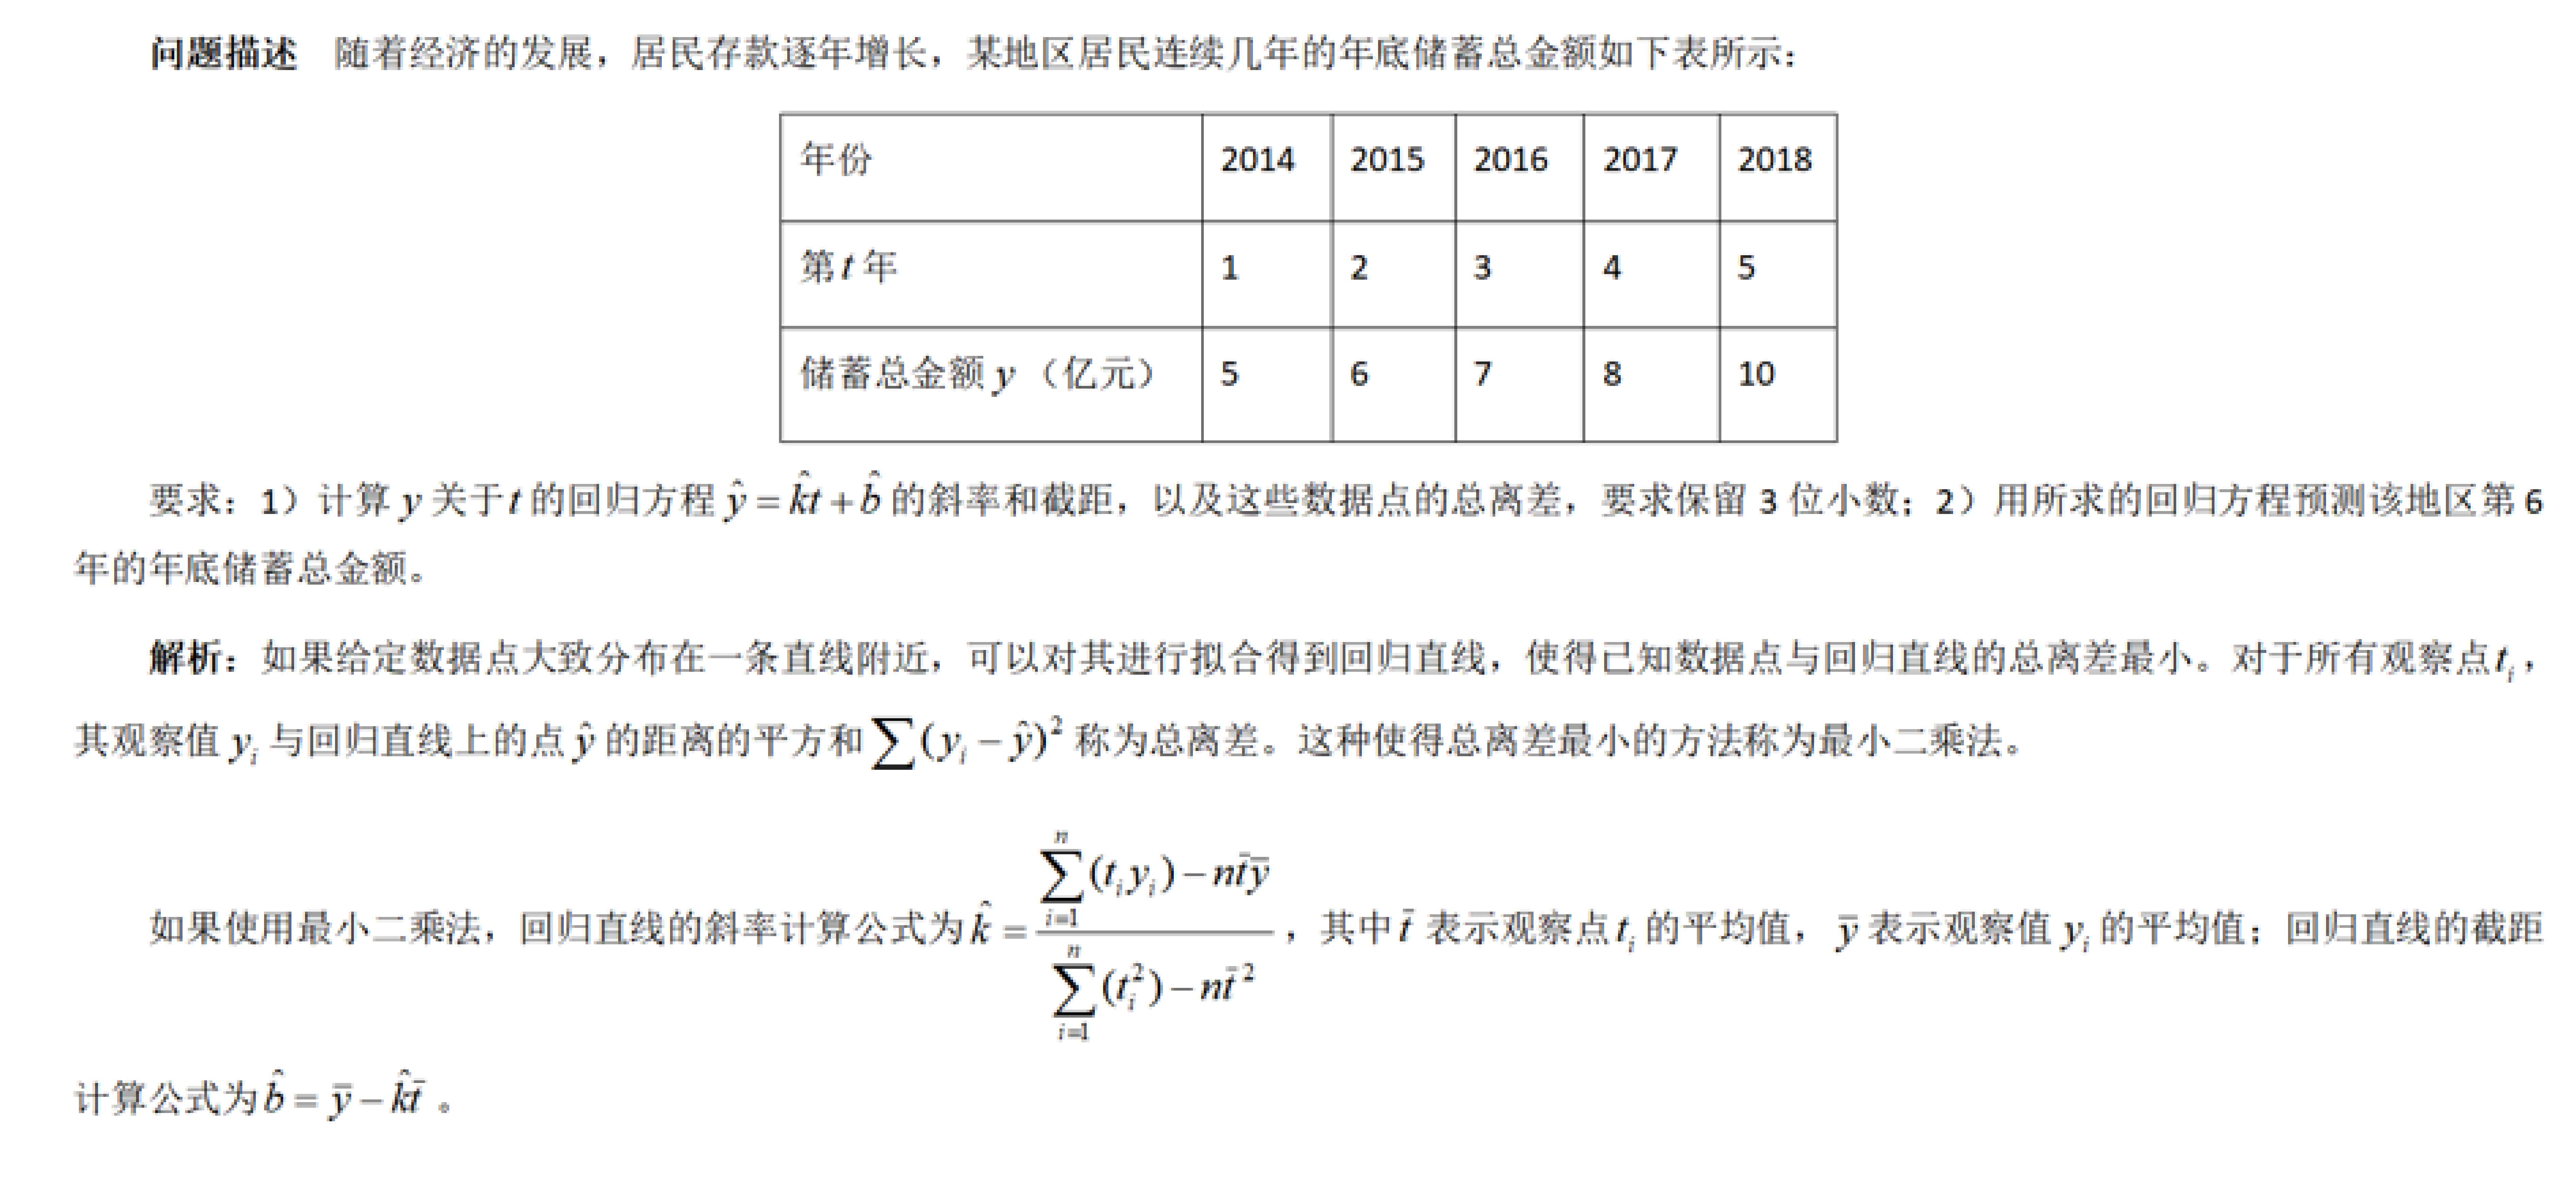

In [52]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 加载图像
image = imread('regreession.png')

# 显示图像
# 设置图像大小
plt.figure(figsize=(25, 10),dpi=500)
plt.imshow(image)
plt.axis('off')  # 可选：去除坐标轴
plt.show()

In [53]:
t,y= (1, 2, 3, 4, 5),(5, 6, 7, 8, 10)
n=len(t)
t_Ave,y_Ave = sum(t)/n,sum(y)/n
ly = sum(map(lambda x,y:x*y, t, y)) - n*t_Ave*y_Ave # 计算分子
lt = sum(map(lambda x:x*x, t)) - n*t_Ave*t_Ave # 计算分母
k = round(ly/lt, 3) # 直线斜率,四舍五入保留3位小数
b = round(y_Ave - k*t_Ave, 3) # 直线截距
print(k,b)  # 输出回归直线的斜率和截距

# 计算已知点与回归直线的距离平方和
dist = sum(map(lambda x,y:(k*x+b-y)**2, t, y))
dist = round(dist, 3)
print(dist) # 前5年距离平方和
print(round(6*k+b, 3))

1.2 3.6
0.4
10.8


#### 7.测试列表中元素的重复度

In [54]:
import random
data1 = [random.randint(1,10)] * 5 # 生成1个1-10之间的随机整数，复制5次
data2 = random.choices(range(10), k=5) # 生成5个0-9之间的随机整数，可重复
data3 = random.sample(range(10), k=5) # 生成5个0-9之间的随机整数，不重复

for data in (data1, data2, data3):
    print('='*20)
    print(data)
    k1 = len(set(data))
    k2 = len(data)
    if k1 == k2:
        print('无重复')
    elif k1 == 1:
        print('完全重复')
    else:
        print('部分重复')

[10, 10, 10, 10, 10]
完全重复
[9, 8, 4, 0, 7]
无重复
[8, 3, 5, 2, 1]
无重复
